# 1. Load Titanic dataset

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\nisar\Downloads\tested.csv",sep=",")
df.columns = df.columns.str.strip()

print(df.head())
print(df.info())


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (

In [13]:
print(list(df.columns))


['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


# 2. Data cleaning

In [14]:
# Handle missing Age 

df['Age'] = df['Age'].fillna(df['Age'].median())

# 3. Answer Analytical Questions

In [15]:
# Who survived more: males or females?
survival_by_gender = df.groupby('Sex')['Survived'].mean()
print("Survival rate by gender:")
print(survival_by_gender)

Survival rate by gender:
Sex
female    1.0
male      0.0
Name: Survived, dtype: float64


In [16]:
# Did passenger class affect survival chances?
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print("\nSurvival rate by passenger class:")
print(survival_by_class)


Survival rate by passenger class:
Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64


In [17]:
# What was the survival rate by age group?

bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

survival_by_age = df.groupby('AgeGroup')['Survived'].mean()
print("\nSurvival rate by age group:")
print(survival_by_age)


Survival rate by age group:
AgeGroup
Child          0.480000
Teen           0.413793
Young Adult    0.335907
Adult          0.393617
Senior         0.363636
Name: Survived, dtype: float64


C:\Users\nisar\AppData\Local\Temp\ipykernel_24040\3336638235.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = df.groupby('AgeGroup')['Survived'].mean()


# 4. Data visualization

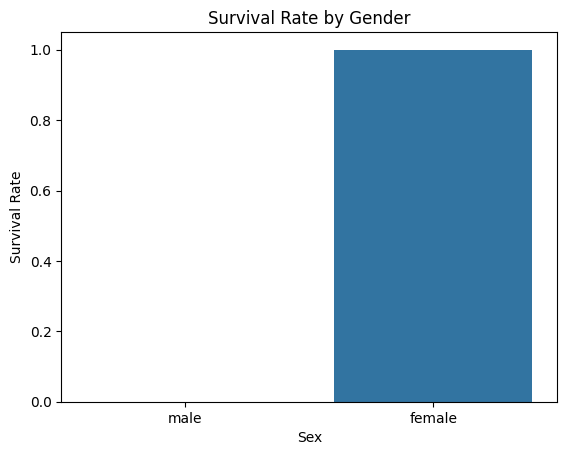

In [18]:
# Bar Chart: Survival by Gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()

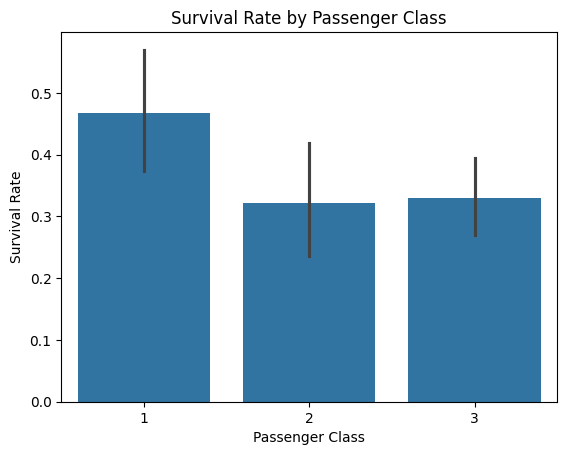

In [19]:
# Bar Chart: Survival by Passenger Class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")
plt.show()

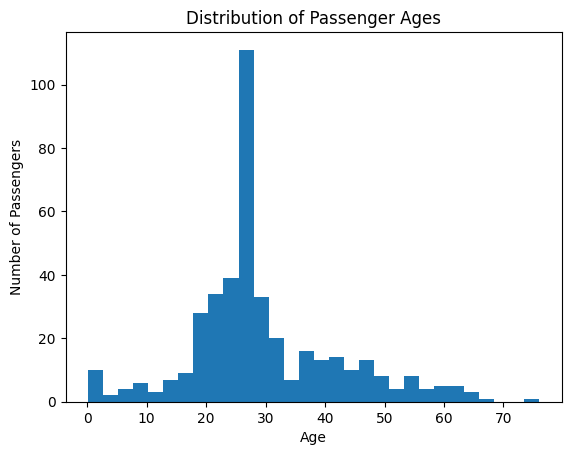

In [20]:
# Histogram: Passenger Ages
plt.hist(df['Age'], bins=30)
plt.title("Distribution of Passenger Ages")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()